# Extension of logistic regression example

In [1]:
from __future__ import print_function

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

In [2]:
mlflow.set_tracking_uri("http://localhost:5000")
print("Tracking URI: ", mlflow.tracking.get_tracking_uri())

Tracking URI:  http://localhost:5000


In [3]:
experiment_name = "sklearn_logistic_regression"
print("experiment_name: ", experiment_name)
mlflow.set_experiment(experiment_name)

client = mlflow.tracking.MlflowClient()
experiment_id = client.get_experiment_by_name(experiment_name).experiment_id
print("experiment_id: ", experiment_id)

experiment_name:  sklearn_logistic_regression
experiment_id:  1


In [4]:
np.random.seed(137)

In [5]:
X, y = datasets.make_classification(n_samples=1000, 
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2)

In [14]:
X

array([[ 0.13743712,  0.47731162],
       [-0.79460754, -0.18454092],
       [-0.91658074, -2.44245753],
       ...,
       [-1.04411541, -0.67259245],
       [-1.43077284, -0.07600782],
       [-0.7002483 , -0.41180123]])

In [6]:
def run(X, y, penalty='l2', log_model=True):
    
    solver = "saga"
    if penalty is "elasticnet":
        l1_ratio = 0.5
    else:
        l1_ratio = None
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    with mlflow.start_run(run_name="jupyter") as run:
        lr = LogisticRegression(penalty=penalty, solver=solver, l1_ratio=l1_ratio)
        lr.fit(X_train, y_train)
        score_train = lr.score(X_train, y_train)
        score_test = lr.score(X_test, y_test)

        prec_test = precision_score(y_test, lr.predict(X_test))
        rec_test = recall_score(y_test, lr.predict(X_test))
        f1_test = f1_score(y_test, lr.predict(X_test))

        print("hyperparameters: ", lr.get_params())
        print("train score: ", score_train)
        print("test score: ", score_test)
        print("test precision: ", prec_test)
        print("test recall: ", rec_test)
        print("test f1 score: ", f1_test)
        
        disp = plot_confusion_matrix(lr, X_test, y_test)
        print(disp.confusion_matrix)
        plt.savefig("sklearn_logreg_conf_mat.png")

        disp = plot_roc_curve(lr, X_test, y_test)
        plt.savefig("sklearn_logreg_roc_curve.png")
    
        print("runId: ", run.info.run_id)
        print("artifact_uri: ", mlflow.get_artifact_uri())
        mlflow.log_metrics({"training score": score_train, "test score": score_test})
        mlflow.log_params(lr.get_params())
        mlflow.log_artifact("sklearn_logreg_conf_mat.png", "figures")
        mlflow.log_artifact("sklearn_logreg_roc_curve.png", "figures")
        mlflow.set_tags({"log_model": log_model, "run_origin": "jupyter"})
        
        if log_model:
            mlflow.sklearn.log_model(lr, "model")

hyperparameters:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
train score:  0.9026666666666666
test score:  0.876
test precision:  0.8671875
test recall:  0.888
test f1 score:  0.8774703557312253
[[108  17]
 [ 14 111]]
runId:  35e41ce6c1924e89bd3fe2b4d7244376
artifact_uri:  file:///C:\Users\s.herold\Projects\AMLD_MLflow\AMLD_2020_MLflow\mlruns/1/35e41ce6c1924e89bd3fe2b4d7244376/artifacts


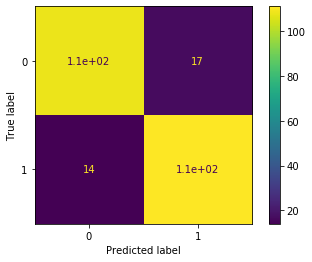

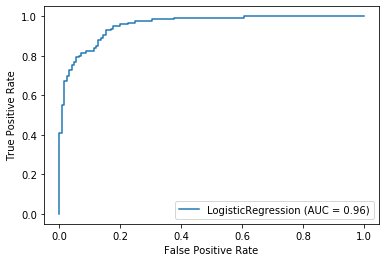

In [7]:
run(X, y, "l2", True)

hyperparameters:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
train score:  0.904
test score:  0.876
test precision:  0.8671875
test recall:  0.888
test f1 score:  0.8774703557312253
[[108  17]
 [ 14 111]]
runId:  363b555478b044ffa7e069b1dfb44e6d
artifact_uri:  file:///C:\Users\s.herold\Projects\AMLD_MLflow\AMLD_2020_MLflow\mlruns/1/363b555478b044ffa7e069b1dfb44e6d/artifacts


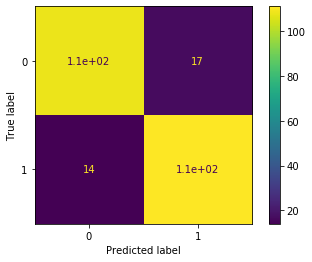

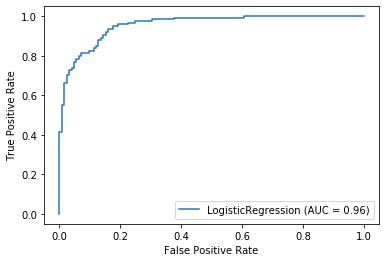

In [8]:
run(X, y, "l1", True)

hyperparameters:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
train score:  0.9026666666666666
test score:  0.876
test precision:  0.8671875
test recall:  0.888
test f1 score:  0.8774703557312253
[[108  17]
 [ 14 111]]
runId:  d9cf94be2d234b3498075a8572e1a77e
artifact_uri:  file:///C:\Users\s.herold\Projects\AMLD_MLflow\AMLD_2020_MLflow\mlruns/1/d9cf94be2d234b3498075a8572e1a77e/artifacts


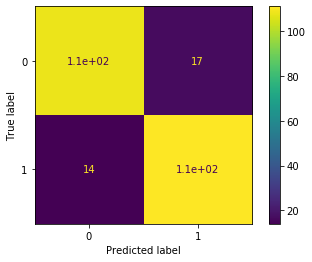

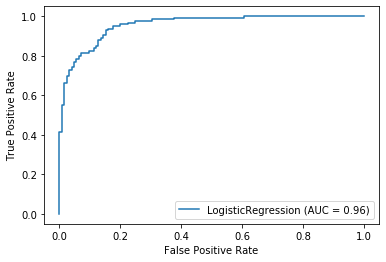

In [9]:
run(X, y, "elasticnet", True)

**Loading `sklearn` from MLflow server**

In [10]:
mlflow.sklearn.SUPPORTED_SERIALIZATION_FORMATS

['pickle', 'cloudpickle']

In [11]:
run_list = client.search_runs(experiment_id, "tags.log_model='True' and params.penalty='l2'")
run_id = run_list[0].info.run_id
run_id

'35e41ce6c1924e89bd3fe2b4d7244376'

In [12]:
sk_model = mlflow.sklearn.load_model("runs:/{}/model".format(run_id))
sk_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
sk_model.predict(X)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

**Creating REST API**

In [ ]:
import os
os.environ["MLFLOW_TRACKING_URI"] = "http://localhost:5000"

In [ ]:
! mlflow models serve -m runs:/5c37ed12cb5a4cd68ddeec596482db6f/model -p 54321

Windows

In [ ]:
! curl http://localhost:54321/invocations
        -H "Content-Type: application/json; format=pandas-split"
        -d "{\"columns\": [\"x\", \"y\"], \"data\": [[1,1]]}"

Linux

In [ ]:
! curl http://localhost:54321/invocations \
        -H 'Content-Type: application/json; format=pandas-split' \
        -d '{"columns": ["x", "y"], "data": [[1,1]]}'